In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv(r'Data\creditcard.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 284807 entries, 0 to 284806

Data columns (total 31 columns):

 #   Column  Non-Null Count   Dtype  

---  ------  --------------   -----  

 0   Time    284807 non-null  float64

 1   V1      284807 non-null  float64

 2   V2      284807 non-null  float64

 3   V3      284807 non-null  float64

 4   V4      284807 non-null  float64

 5   V5      284807 non-null  float64

 6   V6      284807 non-null  float64

 7   V7      284807 non-null  float64

 8   V8      284807 non-null  float64

 9   V9      284807 non-null  float64

 10  V10     284807 non-null  float64

 11  V11     284807 non-null  float64

 12  V12     284807 non-null  float64

 13  V13     284807 non-null  float64

 14  V14     284807 non-null  float64

 15  V15     284807 non-null  float64

 16  V16     284807 non-null  float64

 17  V17     284807 non-null  float64

 18  V18     284807 non-null  float64

 19  V19     284807 non-null  float64

 20  V20     284807 non-null

In [49]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [50]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('After Drop:',df.duplicated().sum())

1081

After Drop: 0


In [51]:
print('No Frauds',round(df['Class'].value_counts()[0]/len(df)*100,2),"% of dataset")
print('Frauds',round(df['Class'].value_counts()[1]/len(df)*100,2),"% of dataset")

No Frauds 99.83 % of dataset

Frauds 0.17 % of dataset


In [52]:
# # Looking for outlier
# plt.figure(figsize=(14,10))
# sns.boxplot(dt)
# plt.title("Box Plot before outlier removing")
# plt.show()

# # Remove Outlier
# def drop_outliers(dt, column_name):
#      iqr = 1.5 * (np.percentile(dt[column_name], 75) - np.percentile(dt[column_name], 25))
#      dt.drop(dt[dt[column_name] > (iqr + np.percentile(dt[column_name], 75))].index, inplace=True)
#      dt.drop(dt[dt[column_name] < (np.percentile(dt[column_name], 25) - iqr)].index, inplace=True)
# for column in dt:
#      drop_outliers(dt,column)

# plt.figure(figsize=(14,10))
# sns.boxplot(dt)
# plt.title("Box Plot after outlier removing")
# plt.show()
'''
Every outliers are fraud (fraud remove when outliers remove)
'''

'\nEvery outliers are fraud (fraud remove when outliers remove)\n'

In [53]:
# imbalance Dataset
# Sub-sample to balance Fraud = No Fraud
from sklearn.preprocessing import StandardScaler,RobustScaler # Robust less sensitive(prone) to outlier


In [54]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['ScaledAmount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['ScaledTime'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [55]:
scaled_amount = df['ScaledAmount']
scaled_time = df['ScaledTime']
df.drop(['ScaledAmount', 'ScaledTime','Time','Amount'], axis=1, inplace=True)
df.insert(0, 'ScaledAmount', scaled_amount)
df.insert(1, 'ScaledTime', scaled_time)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [57]:
# Original Data

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# to see the train and test label distribution
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]

Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]

Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]

Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]

----------------------------------------------------------------------------------------------------

Label Distributions: 



[0.99833466 0.00166534]

[0.99832584 0.00167416]


In [58]:
# simple undersimpling to more understand in data

df = df.sample(frac=1) # Shuffle

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
simple_df = normal_distributed_df.sample(frac=1, random_state=42)

simple_df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 946 entries, 10568 to 48094

Data columns (total 31 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   ScaledAmount  946 non-null    float64

 1   ScaledTime    946 non-null    float64

 2   V1            946 non-null    float64

 3   V2            946 non-null    float64

 4   V3            946 non-null    float64

 5   V4            946 non-null    float64

 6   V5            946 non-null    float64

 7   V6            946 non-null    float64

 8   V7            946 non-null    float64

 9   V8            946 non-null    float64

 10  V9            946 non-null    float64

 11  V10           946 non-null    float64

 12  V11           946 non-null    float64

 13  V12           946 non-null    float64

 14  V13           946 non-null    float64

 15  V14           946 non-null    float64

 16  V15           946 non-null    float64

 17  V16           946 non-null    float64

 18  V17   

In [59]:
print('Distribution of the Classes in the subsample dataset')
print(simple_df['Class'].value_counts()/len(simple_df))

Distribution of the Classes in the subsample dataset

Class

1    0.5

0    0.5

Name: count, dtype: float64


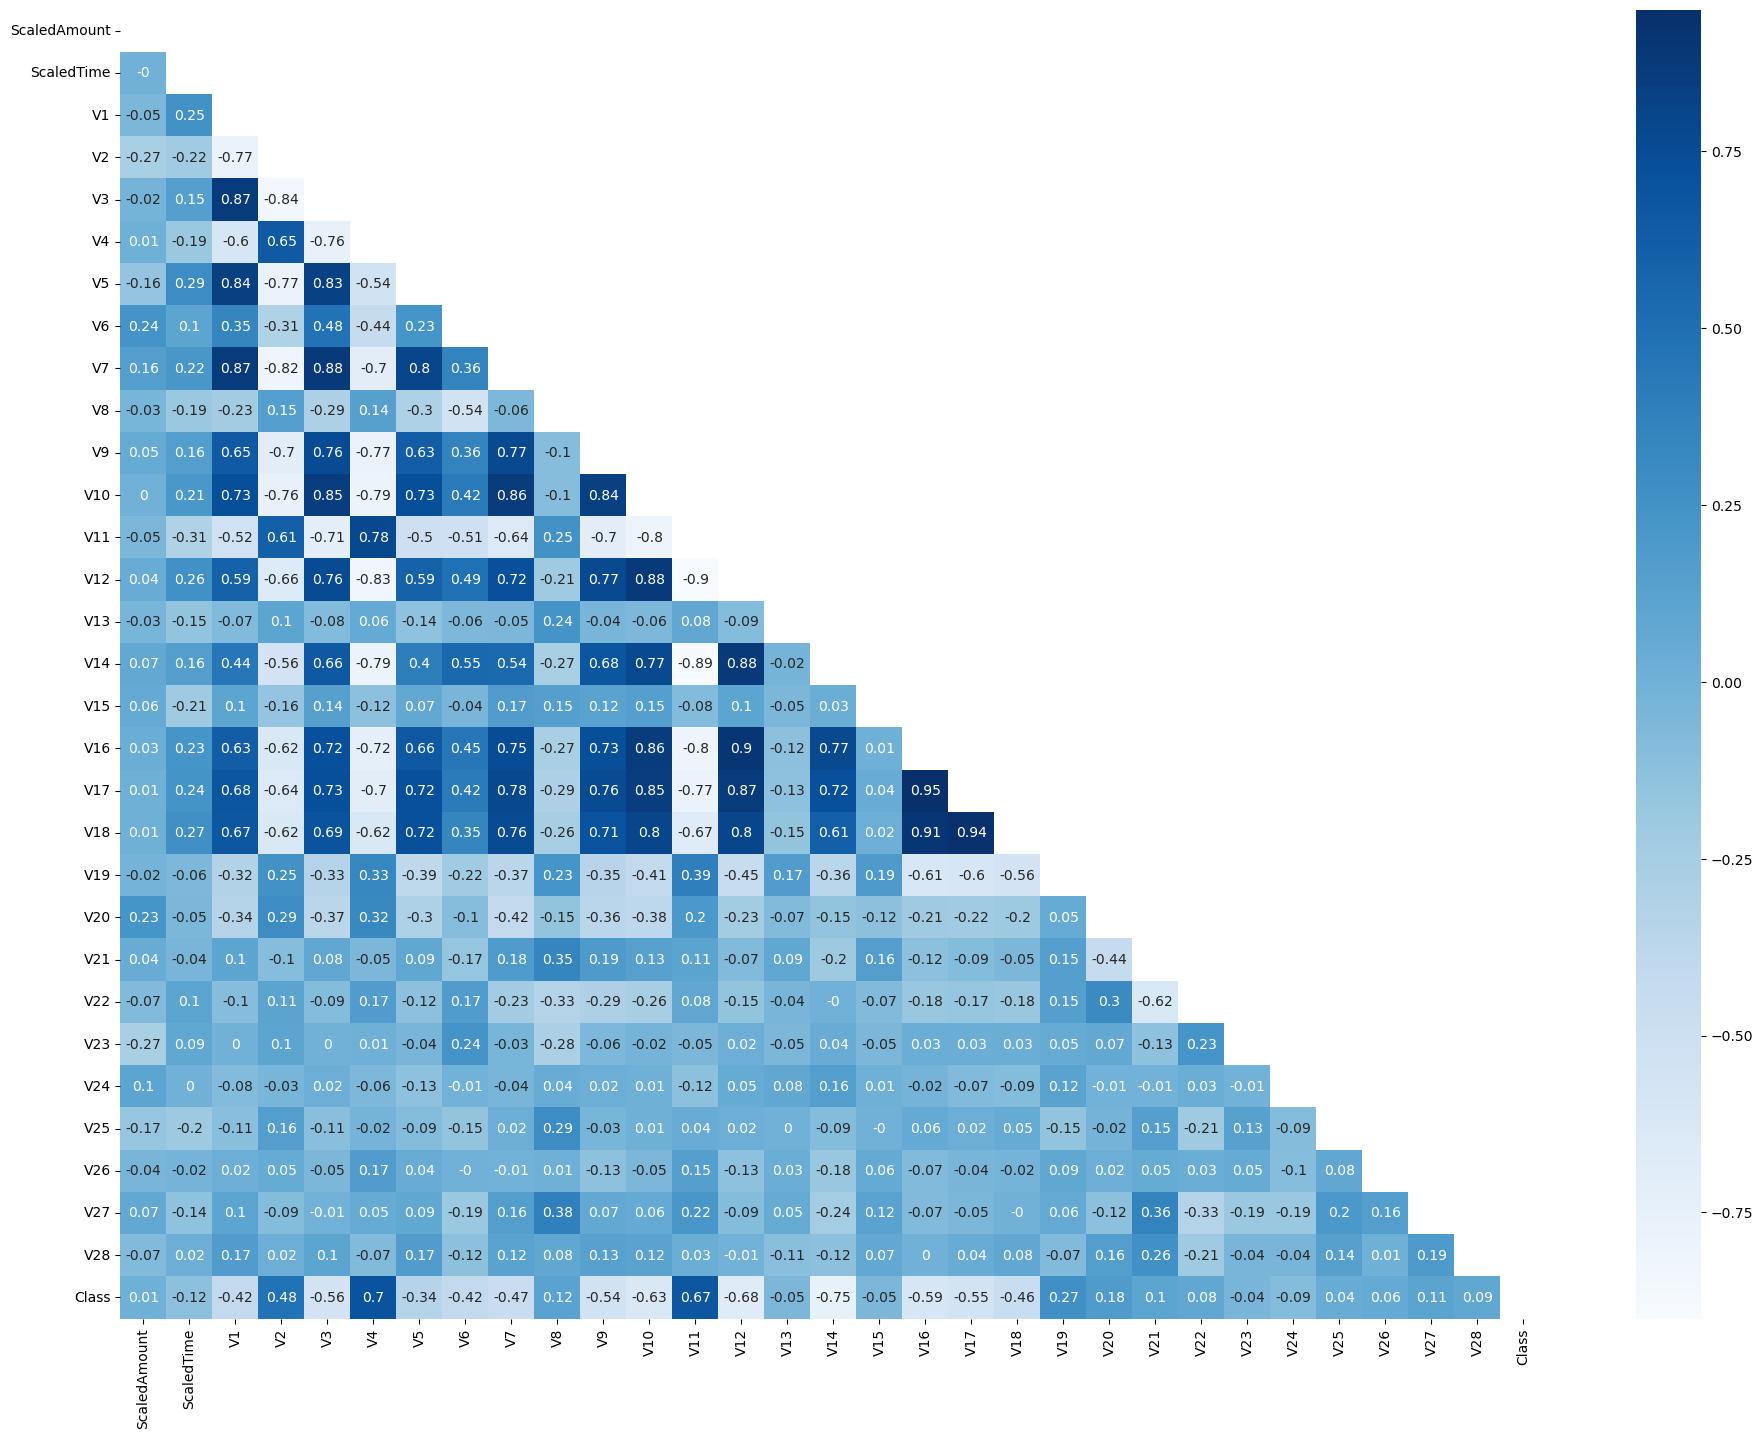

In [60]:
plt.figure(figsize=(23,17))
sub_sample_corr = round(simple_df.corr(),2)
matrix =np.triu(np.ones_like(sub_sample_corr))
sns.heatmap(sub_sample_corr, cmap='Blues', annot=True, mask = matrix)
plt.show()

In [61]:
# Check Fraud Outliers
print('Negative correlation features')
v14_fraud = simple_df['V14'].loc[simple_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))

v3_fraud = simple_df['V3'].loc[simple_df['Class'] == 1].values
q25, q75 = np.percentile(v3_fraud, 25), np.percentile(v3_fraud, 75)
v3_iqr = q75 - q25
v3_cut_off = v3_iqr * 1.5
v3_lower, v3_upper = q25 - v3_cut_off, q75 + v3_cut_off
outliers = [x for x in v3_fraud if x < v3_lower or x > v3_upper]
print('Feature V3 Outliers for Fraud Cases: {}'.format(len(outliers)))

v6_fraud = simple_df['V6'].loc[simple_df['Class'] == 1].values
q25, q75 = np.percentile(v6_fraud, 25), np.percentile(v6_fraud, 75)
v6_iqr = q75 - q25
v6_cut_off = v6_iqr * 1.5
v6_lower, v6_upper = q25 - v6_cut_off, q75 + v6_cut_off
outliers = [x for x in v6_fraud if x < v6_lower or x > v6_upper]
print('Feature V6 Outliers for Fraud Cases: {}'.format(len(outliers)))

print('\nPositive correlation features')
v4_fraud = simple_df['V4'].loc[simple_df['Class'] == 1].values
q25, q75 = np.percentile(v4_fraud, 25), np.percentile(v4_fraud, 75)
v4_iqr = q75 - q25
v4_cut_off = v4_iqr * 1.5
v4_lower, v4_upper = q25 - v4_cut_off, q75 + v4_cut_off
outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
print('Feature V4 Outliers for Fraud Cases: {}'.format(len(outliers)))

v11_fraud = simple_df['V11'].loc[simple_df['Class'] == 1].values
q25, q75 = np.percentile(v11_fraud, 25), np.percentile(v11_fraud, 75)
v11_iqr = q75 - q25
v11_cut_off = v11_iqr * 1.5
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))

v19_fraud = simple_df['V19'].loc[simple_df['Class'] == 1].values
q25, q75 = np.percentile(v19_fraud, 25), np.percentile(v19_fraud, 75)
v19_iqr = q75 - q25
v19_cut_off = v19_iqr * 1.5
v19_lower, v19_upper = q25 - v19_cut_off, q75 + v19_cut_off
outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
print('Feature V19 Outliers for Fraud Cases: {}'.format(len(outliers)))

Negative correlation features

Feature V14 Outliers for Fraud Cases: 7

Feature V3 Outliers for Fraud Cases: 56

Feature V6 Outliers for Fraud Cases: 11



Positive correlation features

Feature V4 Outliers for Fraud Cases: 0

Feature V11 Outliers for Fraud Cases: 12

Feature V19 Outliers for Fraud Cases: 5


NearMiss

In [62]:
from imblearn.under_sampling import NearMiss

In [63]:
# Preparing for NearMiss
sample_X = df.drop('Class', axis=1)
sample_y = df['Class']

for train_index, test_index in sss.split(sample_X, sample_y):
    print("Train:", train_index, "Test:", test_index)
    sample_Xtrain, sample_Xtest = sample_X.iloc[train_index], sample_X.iloc[test_index]
    sample_ytrain, sample_ytest = sample_y.iloc[train_index], sample_y.iloc[test_index]

#.values to turn the values into an array
sample_Xtrain = sample_Xtrain.values
sample_Xtest = sample_Xtest.values
sample_ytrain = sample_ytrain.values
sample_ytest = sample_ytest.values 

# Implement NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(sample_X.values, sample_y.values)
print('\nNearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

Train: [ 56736  56737  56738 ... 283723 283724 283725] Test: [    0     1     2 ... 61100 61541 62120]

Train: [     0      1      2 ... 283723 283724 283725] Test: [ 56736  56737  56738 ... 119385 119486 119913]

Train: [     0      1      2 ... 283723 283724 283725] Test: [113478 113479 113480 ... 170233 170234 170235]

Train: [     0      1      2 ... 283723 283724 283725] Test: [170236 170237 170238 ... 228848 229118 229211]

Train: [     0      1      2 ... 228848 229118 229211] Test: [226976 226977 226978 ... 283723 283724 283725]



NearMiss Label Distribution: Counter({0: 473, 1: 473})


Building Model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [65]:
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, ShuffleSplit, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [66]:
X_nm_train, X_nm_test, y_nm_train, y_nm_test = train_test_split(X_nearmiss, y_nearmiss, test_size = 0.20)
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_nm_train), len(y_nm_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_nm_test), len(y_nm_test)))

Length of X (train): 756 | Length of y (train): 756

Length of X (test): 190 | Length of y (test): 190


In [67]:
log_mod = LogisticRegression().fit(X_nm_train, y_nm_train)
svc_mod = SVC().fit(X_nm_train, y_nm_train)
dt_mod = DecisionTreeClassifier().fit(X_nm_train, y_nm_train)
xg_mod = XGBClassifier().fit(X_nm_train, y_nm_train)

In [68]:
def plot_learning_curve(estimator1, estimator2,estimator3,estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(25,20), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    # np.linspace(.1, 1.0, 5) mean start from 0.1 end at 1.0 devides to 5 values [0.1, 0.325, 0.55, 0.775, 1.0]
    # fill_between create shade area meaning to the range of expected performance
    # n_jobs refer to cpu core to compute

    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Estimator 2
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Support Vector Classifier \nLearning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Estimator 3
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Decision Tree Classifier \nLearning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Estimator 4
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("XGBoost Classifier \nLearning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

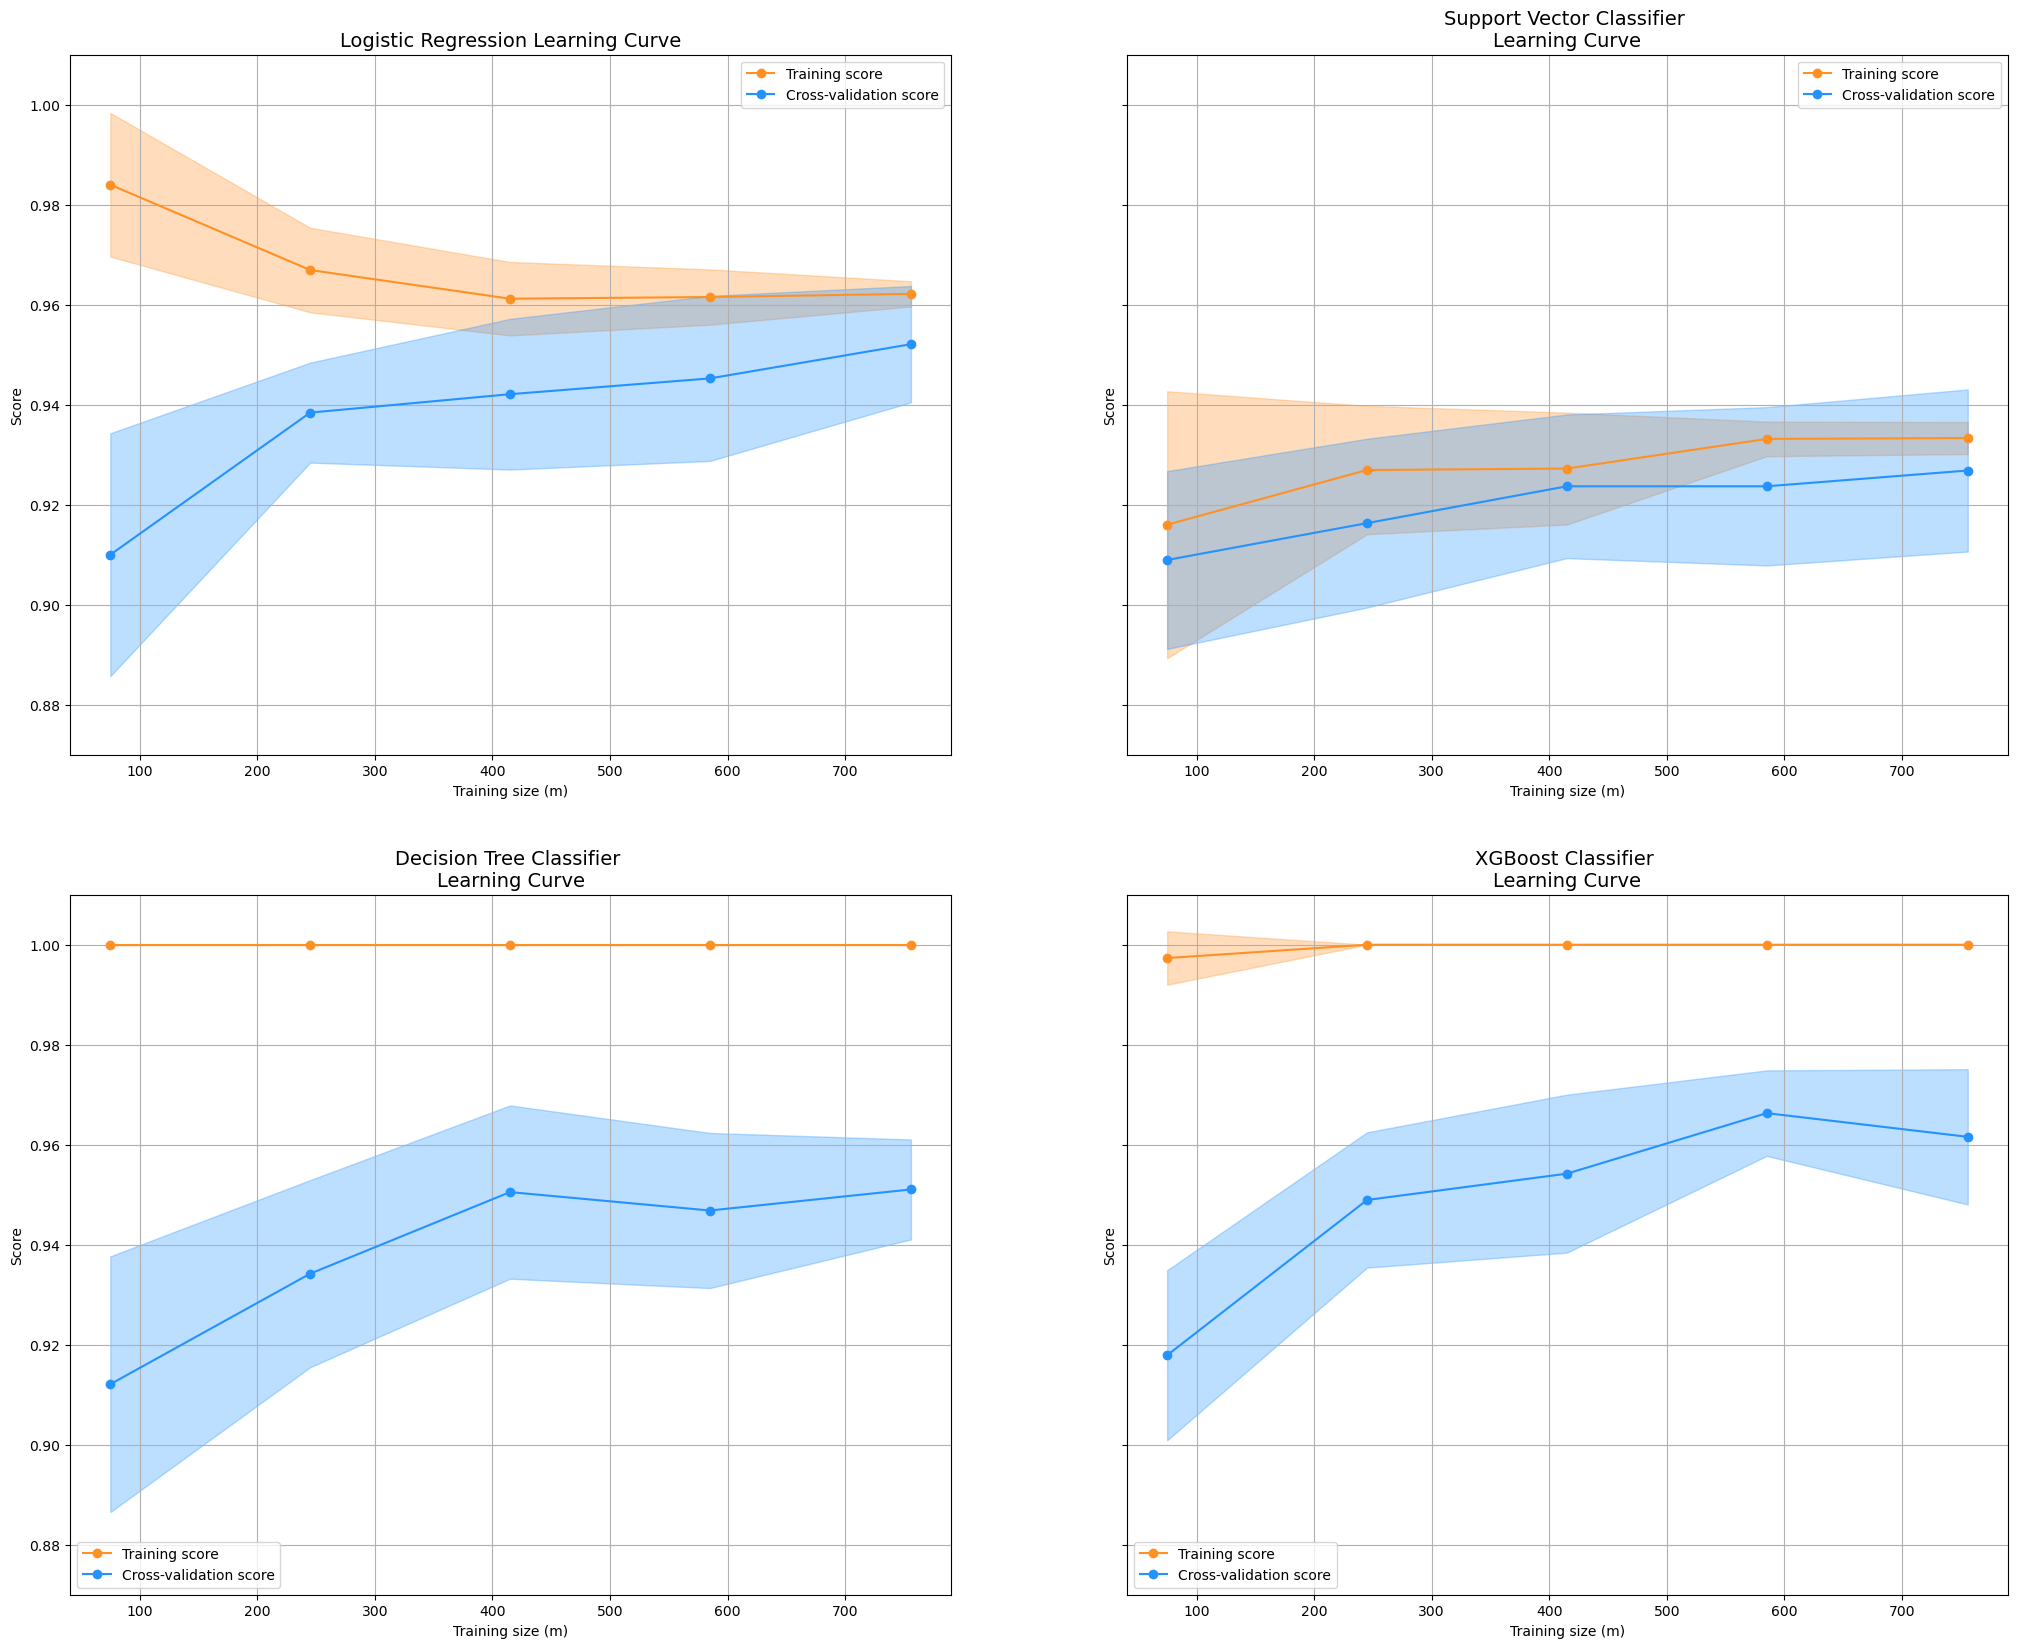

In [69]:

cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=42)
plot_learning_curve(log_mod, svc_mod, dt_mod, xg_mod, X_nearmiss, y_nearmiss, (0.87, 1.01), cv=cv, n_jobs=4)

In [70]:
'''
Logistic Regresion is best fitting here
SVC looking good too
Decision Tree and XGBoost is overfitting 
'''

'\nLogistic Regresion is best fitting here\nSVC looking good too\nDecision Tree and XGBoost is overfitting \n'

GridSeachCV - Hyperparameter Tuning

In [71]:
# Logistic Nearmiss

for train, test in sss.split(X_nm_train, y_nm_train):
    nm_log_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_mod) # NearMiss happens during Cross Validation not before..
    nm_log_model = nm_log_pipeline.fit(X_nm_train[train], y_nm_train[train])
    nm_log_pred = nm_log_model.predict(X_nm_train[test])

In [72]:
# SVC NearMiss

for train, test in sss.split(X_nm_train, y_nm_train):
    nm_svc_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), svc_mod) # NearMiss happens during Cross Validation not before..
    nm_svc_model = nm_svc_pipeline.fit(X_nm_train[train], y_nm_train[train])
    nm_svc_pred = nm_svc_model.predict(X_nm_train[test])

In [73]:
labels = ['No Fraud', 'Fraud']

print('-'*19,'Before GridSearchCV','-'*20)

print('-'*19,"Logistic Regression",'-'*19,)
log_val_score = cross_val_score(nm_log_model, X_nm_train, y_nm_train, cv=5)
print("\nCross val score", round(log_val_score.mean(), 3))
print('')
log_pred = nm_log_model.predict(X_nm_test)
print(classification_report(y_nm_test, log_pred, target_names=labels))

print('-'*18,"Support Vector Classifier",'-'*18,)
svc_val_score = cross_val_score(nm_svc_model, X_nm_train, y_nm_train, cv=5)
print("\nCross val score", round(svc_val_score.mean(), 3))
print('')
svc_pred = nm_svc_model.predict(X_nm_test)
print(classification_report(y_nm_test, svc_pred, target_names=labels))

------------------- Before GridSearchCV --------------------

------------------- Logistic Regression -------------------



Cross val score 0.942



              precision    recall  f1-score   support



    No Fraud       0.91      0.99      0.95        95

       Fraud       0.99      0.91      0.95        95



    accuracy                           0.95       190

   macro avg       0.95      0.95      0.95       190

weighted avg       0.95      0.95      0.95       190



------------------ Support Vector Classifier ------------------



Cross val score 0.929



              precision    recall  f1-score   support



    No Fraud       0.89      0.99      0.94        95

       Fraud       0.99      0.87      0.93        95



    accuracy                           0.93       190

   macro avg       0.94      0.93      0.93       190

weighted avg       0.94      0.93      0.93       190




In [74]:
# Logistic Regression
log_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization norm
    'solver': ['liblinear', 'saga']}      # Algorithm to use in the optimization problem

grid_log = GridSearchCV(LogisticRegression(), log_params)
grid_log.fit(X_nm_train, y_nm_train)
log_bestmod = grid_log.best_estimator_


In [75]:
# Support Vector Classifier
svc_params = {
    'C': [0.1, 1, 10],                                      # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],         # Kernel type
    'gamma': ['scale', 'auto']}                             # Kernel coefficient

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_nm_train, y_nm_train)
svc_bestmod = grid_svc.best_estimator_

In [76]:
# Logistic Nearmiss with best parameters

for train, test in sss.split(X_nm_train, y_nm_train):
    nm_log_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_bestmod) # NearMiss happens during Cross Validation not before..
    nm_log_model = nm_log_pipeline.fit(X_nm_train[train], y_nm_train[train])
    nm_log_pred = nm_log_model.predict(X_nm_train[test])

In [77]:
# SVC NearMiss with best parameters

for train, test in sss.split(X_nm_train, y_nm_train):
    nm_svc_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), svc_bestmod) # NearMiss happens during Cross Validation not before..
    nm_svc_model = nm_svc_pipeline.fit(X_nm_train[train], y_nm_train[train])
    nm_svc_pred = nm_svc_model.predict(X_nm_train[test])

In [78]:
print('-'*19,'After GridSearchCV','-'*20)

print('-'*19,"Logistic Regression",'-'*19,)
log_val_score = cross_val_score(nm_log_model, X_nm_train, y_nm_train, cv=5)
print("\nCross val score", round(log_val_score.mean(), 3))
print('')
log_pred = nm_log_model.predict(X_nm_test)
print(classification_report(y_nm_test, log_pred, target_names=labels))

print('-'*18,"Support Vector Classifier",'-'*18,)
svc_val_score = cross_val_score(nm_svc_model, X_nm_train, y_nm_train, cv=5)
print("\nCross val score", round(svc_val_score.mean(), 3))
print('')
svc_pred = nm_svc_model.predict(X_nm_test)
print(classification_report(y_nm_test, svc_pred, target_names=labels))

------------------- After GridSearchCV --------------------

------------------- Logistic Regression -------------------



Cross val score 0.943



              precision    recall  f1-score   support



    No Fraud       0.93      0.99      0.96        95

       Fraud       0.99      0.93      0.96        95



    accuracy                           0.96       190

   macro avg       0.96      0.96      0.96       190

weighted avg       0.96      0.96      0.96       190



------------------ Support Vector Classifier ------------------



Cross val score 0.963



              precision    recall  f1-score   support



    No Fraud       0.95      0.99      0.97        95

       Fraud       0.99      0.95      0.97        95



    accuracy                           0.97       190

   macro avg       0.97      0.97      0.97       190

weighted avg       0.97      0.97      0.97       190




------------------------- Logistic Regression NearMiss -------------------------


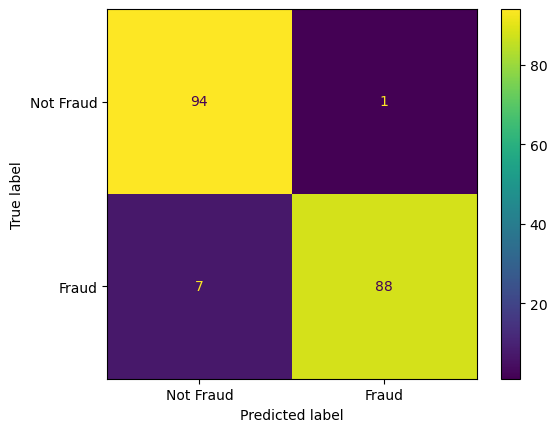

------------------------- Support Vector Classifier NearMiss -------------------------


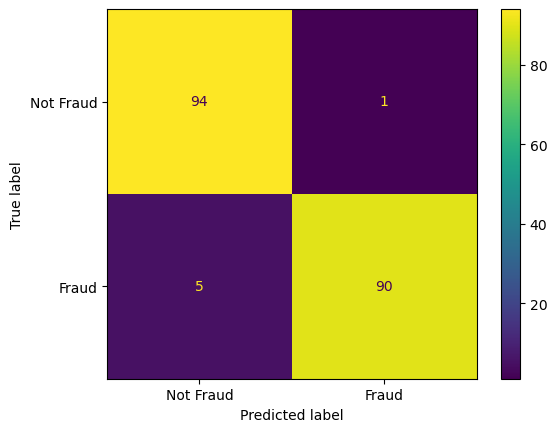

In [79]:
print('-'*25,"Logistic Regression NearMiss",'-'*25,)
log_pred = nm_log_model.predict(X_nm_test)
log_cm = confusion_matrix(y_nm_test, log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot()
plt.show()

print('-'*25,"Support Vector Classifier NearMiss",'-'*25,)
svc_pred = nm_svc_model.predict(X_nm_test)
svc_cm = confusion_matrix(y_nm_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm, display_labels = ['Not Fraud', 'Fraud'])
disp.plot()
plt.show()


In [80]:
log_reg_pred = cross_val_predict(log_bestmod, X_nm_train, y_nm_train, cv=5)
svc_pred = cross_val_predict(svc_bestmod, X_nm_train, y_nm_train, cv=5)

print('-'*20, "ROC-AUC NearMiss",'-'*20)
print('Logistic Regression : ', round(roc_auc_score(y_nm_train, log_reg_pred), 3))
print('Support Vector Classifier : ', round(roc_auc_score(y_nm_train, svc_pred), 3))


-------------------- ROC-AUC NearMiss --------------------

Logistic Regression :  0.943

Support Vector Classifier :  0.963


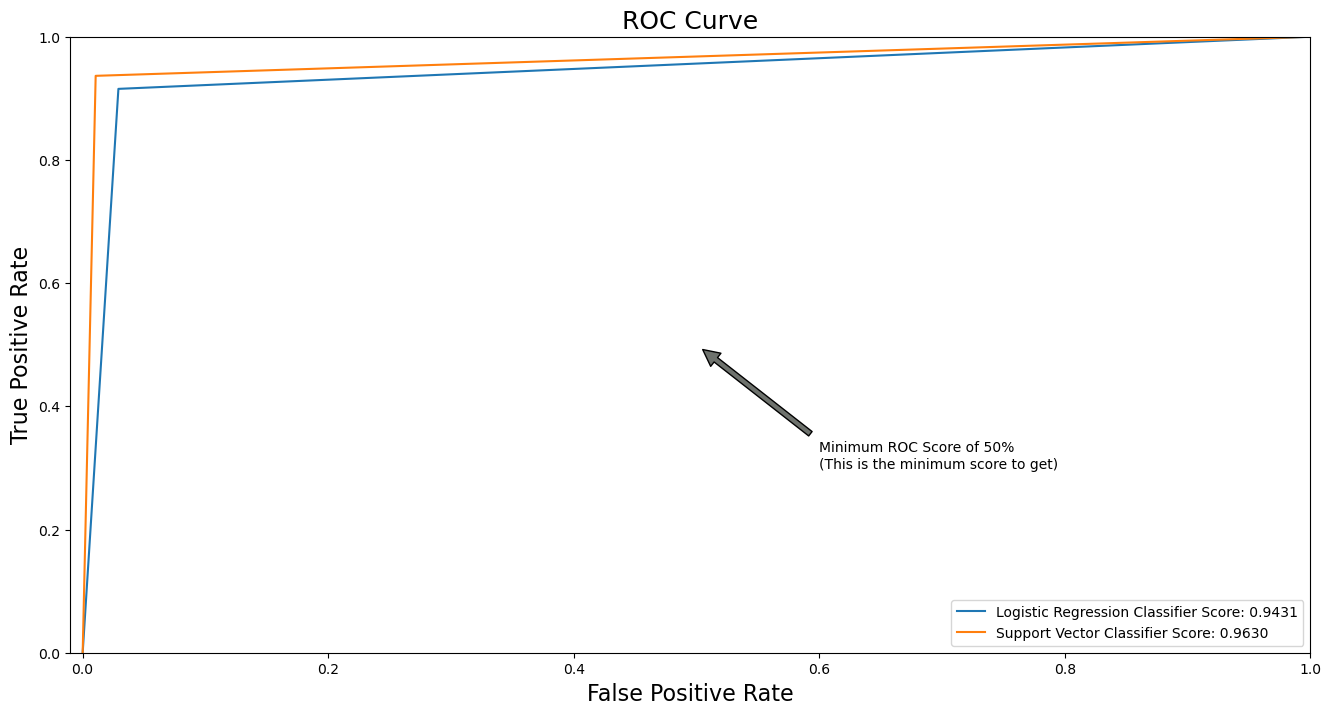

In [82]:
log_fpr, log_tpr, log_thresold = roc_curve(y_nm_train, log_reg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_nm_train, svc_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)

    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_nm_train, log_reg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_nm_train, svc_pred)))

    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

    plt.annotate('Minimum ROC Score of 50% \n(This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr)
plt.show()

With SMOTE

In [83]:
# Implement SMOTE
X_SMOTE, y_SMOTE = SMOTE().fit_resample(sample_X.values, sample_y.values)
print('SMOTE Label Distribution: {}'.format(Counter(y_SMOTE)))

SMOTE Label Distribution: Counter({0: 283253, 1: 283253})


In [84]:
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE,y_SMOTE,test_size = 0.20)

In [85]:
# Logistic SMOTE
for train, test in sss.split(X_SMOTE_train, y_SMOTE_train):
    sm_log_pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_bestmod) # SMOTE during Cross Validation
    sm_log_model = sm_log_pipeline.fit(X_SMOTE_train[train], y_SMOTE_train[train])
    sm_log_pred = sm_log_model.predict(X_SMOTE_train[test])


'''
if sampling_strategy is 0.5
Sampling Strategy : ( Samples of Minority Class ) / ( Samples of Majority Class )

--- After oversampling will be ---
Minority Class will be 0.5 of Majority Class
'''

'\nif sampling_strategy is 0.5\nSampling Strategy : ( Samples of Minority Class ) / ( Samples of Majority Class )\n\n--- After oversampling will be ---\nMinority Class will be 0.5 of Majority Class\n'

------------------------- Logistic Regression SMOTE -------------------------


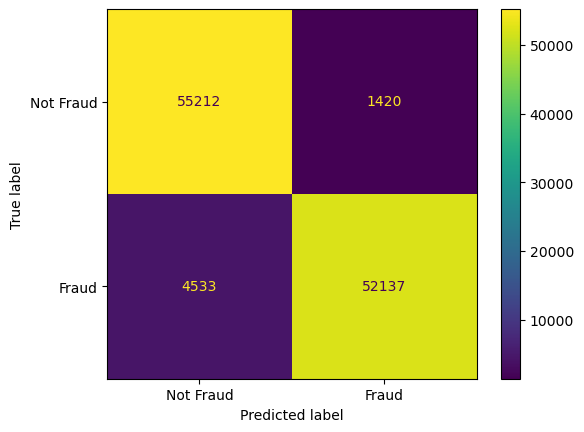

In [86]:
print('-'*25,"Logistic Regression SMOTE",'-'*25,)
log_pred = log_bestmod.predict(X_SMOTE_test)
log_cm = confusion_matrix(y_SMOTE_test, log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot()
plt.show()

In [87]:
labels = ['No Fraud', 'Fraud']
log_pred = log_bestmod.predict(X_SMOTE_test)
print('-'*25,"Logistic Regression",'-'*25,)
print(classification_report(y_SMOTE_test, log_pred, target_names=labels))

------------------------- Logistic Regression -------------------------

              precision    recall  f1-score   support



    No Fraud       0.92      0.97      0.95     56632

       Fraud       0.97      0.92      0.95     56670



    accuracy                           0.95    113302

   macro avg       0.95      0.95      0.95    113302

weighted avg       0.95      0.95      0.95    113302




In [88]:
log_pred = log_bestmod.predict(X_SMOTE_train)

print('-'*20, "ROC-AUC SMOTE",'-'*20)
print('Logistic Regression : ', round(roc_auc_score(y_SMOTE_train, log_pred), 3))

-------------------- ROC-AUC SMOTE --------------------
Logistic Regression :  0.947
